# Analysis of the image survey

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(style="white")
sns.set_context("paper", font_scale=1.2, rc={"lines.linewidth": 2.5})

In [3]:
# getting the relevant part of the survey responses into a df
# replace the yes, no, maybe with 1, 0 and 0.5 respectively.

df_attn2_unfiltered = pd.read_csv("data/attn2_unfiltered.csv")
df_attn2_unfiltered = df_attn2_unfiltered.loc[:, 'look':'rate'].replace("yes", 1).replace("no", 0).replace("maybe", 0.5)
df_attn2_unfiltered = df_attn2_unfiltered.dropna() #there's a nan value in one of the rows

df_attn2_filtered = pd.read_csv("data/attn2_filtered.csv")
df_attn2_filtered = df_attn2_filtered.loc[:, 'look':'rate'].replace("yes", 1).replace("no", 0).replace("maybe", 0.5)

df_attnf = pd.read_csv("data/attn-f.csv")
df_attnf = df_attnf.loc[:, 'look':'rate'].replace("yes", 1).replace("no", 0).replace("maybe", 0.5)
df_attnf.head()

,look,mood,reflect,aesthetics,figuratives,rate
0,1.0,1.0,1.0,3,5,5
1,1.0,0.0,1.0,2,4,3
2,1.0,0.0,0.0,2,1,4
3,1.0,0.0,0.0,2,1,4
4,1.0,0.0,0.0,1,1,3


### Plotting the distributions

Text(0.5,1,'Distribution of the answers to:\n"Do you think the artwork is aesthetically pleasing?"')

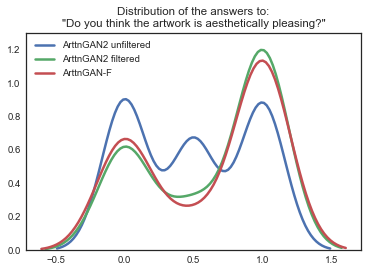

In [45]:
sns.distplot(df_attn2_unfiltered[['look']], hist=False, label="ArttnGAN2 unfiltered")
sns.distplot(df_attn2_filtered[['look']], hist=False, label="ArttnGAN2 filtered")
sns.distplot(df_attnf[['look']], hist=False, label="ArttnGAN-F")
plt.ylim(0, 1.3)
plt.title("Distribution of the answers to:\n\"Do you think the artwork is aesthetically pleasing?\"")

Text(0.5,1,'Distribution of the answers to:\n"Do you think the artwork portrays the mood of the title?"')

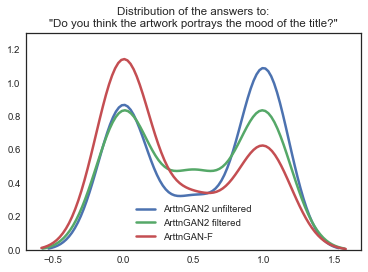

In [46]:
sns.distplot(df_attn2_unfiltered[['mood']], hist=False, label="ArttnGAN2 unfiltered")
sns.distplot(df_attn2_filtered[['mood']], hist=False, label="ArttnGAN2 filtered")
sns.distplot(df_attnf[['mood']], hist=False, label="ArttnGAN-F")
plt.ylim(0, 1.3)
plt.title("Distribution of the answers to:\n\"Do you think the artwork portrays the mood of the title?\"")

Text(0.5,1,'Distribution of the answers to:\n"Does looking at the artwork make you reflect more about the title?"')

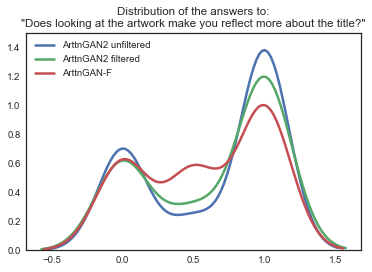

In [47]:
sns.distplot(df_attn2_unfiltered[['reflect']], hist=False, label="ArttnGAN2 unfiltered")
sns.distplot(df_attn2_filtered[['reflect']], hist=False, label="ArttnGAN2 filtered")
sns.distplot(df_attnf[['reflect']], hist=False, label="ArttnGAN-F")
plt.ylim(0, 1.5)
plt.title("Distribution of the answers to:\n\"Does looking at the artwork make you reflect more about the title?\"")

Text(0.5,1,'Distribution of the answers to:\n"To what degree do you feel the artwork is aesthetically related to the title?"')

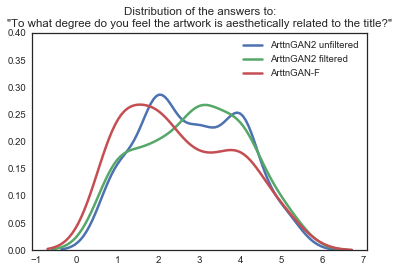

In [48]:
sns.distplot(df_attn2_unfiltered[['aesthetics']], hist=False, label="ArttnGAN2 unfiltered")
sns.distplot(df_attn2_filtered[['aesthetics']], hist=False, label="ArttnGAN2 filtered")
sns.distplot(df_attnf[['aesthetics']], hist=False, label="ArttnGAN-F")
plt.ylim(0, 0.4)
plt.title("Distribution of the answers to:\n\"To what degree do you feel the artwork is aesthetically related to the title?\"")

Text(0.5,1,'Distribution of the answers to:\n"To what degree do you feel the artwork is figuratively related to the title?"')

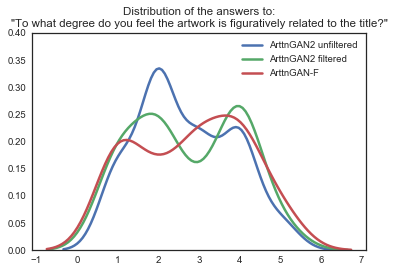

In [49]:
sns.distplot(df_attn2_unfiltered[['figuratives']], hist=False, label="ArttnGAN2 unfiltered")
sns.distplot(df_attn2_filtered[['figuratives']], hist=False, label="ArttnGAN2 filtered")
sns.distplot(df_attnf[['figuratives']], hist=False, label="ArttnGAN-F")
plt.ylim(0, 0.4)
plt.title("Distribution of the answers to:\n\"To what degree do you feel the artwork is figuratively related to the title?\"")

Text(0.5,1,'Distribution of the answers to:\n"What would you rate this artwork (overall) on a scale of 1-5?"')

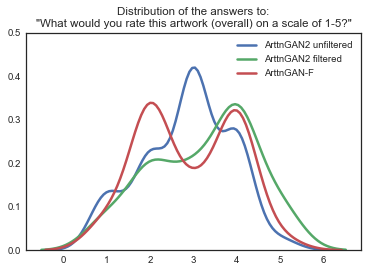

In [50]:
sns.distplot(df_attn2_unfiltered[['rate']], hist=False, label="ArttnGAN2 unfiltered")
sns.distplot(df_attn2_filtered[['rate']], hist=False, label="ArttnGAN2 filtered")
sns.distplot(df_attnf[['rate']], hist=False, label="ArttnGAN-F")
plt.ylim(0, 0.5)
plt.title("Distribution of the answers to:\n\"What would you rate this artwork (overall) on a scale of 1-5?\"")

### Cohen's d & Kruskal-Wallis H-test

In [41]:
# https://en.wikipedia.org/wiki/Effect_size#Cohen's_d

def cohensd(d1, d2):
    # sample size
    n1, n2 = len(d1), len(d2)
    # variance
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    # s
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # u
    u1, u2 = np.mean(d1), np.mean(d2)
    return (u1 - u2) / s

In [57]:
question_labels = ["look", "mood", "reflect", "aesthetics", "figuratives", "rate"]

In [60]:
print("Cohen's-d & Kruskal-Wallis H-test for ArttnGAN2 filtered (control = ArttnGAN2 unfiltered):")
cohens_d_attn2_f = list()
kruskal_attn2_f = list()

for label in question_labels:
    cod = np.abs(cohensd(df_attn2_unfiltered[label].values,df_attn2_filtered[label].values))
    cohens_d_attn2_f.append(cod)
    
    kr = stats.kruskal(df_attn2_unfiltered[label].values,df_attn2_filtered[label].values)
    kruskal_attn2_f.append(kr)
    
    print(label,str(cod), kr.pvalue)

Cohen's-d & Kruskal-Wallis H-test for ArttnGAN2 filtered (control = ArttnGAN2 unfiltered):
look 0.330137254574 0.0254570635229
mood 0.107015871466 0.461261358723
reflect 0.0173664483727 0.859071699104
aesthetics 0.0407077647272 0.771942738495
figuratives 0.051930790822 0.777200749422
rate 0.341053114953 0.0229617632024


In [61]:
print("Cohen's-d & Kruskal-Wallis H-test for ArttnGAN-F (control = ArttnGAN2 unfiltered):")
cohens_d_attnf = list()
kruskal_attnf = list()

for label in question_labels:
    cod = np.abs(cohensd(df_attn2_unfiltered[label].values,df_attnf[label].values))
    cohens_d_attnf.append(cod)
    
    kr = stats.kruskal(df_attn2_unfiltered[label].values,df_attnf[label].values)
    kruskal_attnf.append(kr)
    
    print(label,str(cod), kr.pvalue)

Cohen's-d & Kruskal-Wallis H-test for ArttnGAN-F (control = ArttnGAN2 unfiltered):
look 0.279183480175 0.0621721699003
mood 0.383133232804 0.0149226542612
reflect 0.135602512434 0.268043791749
aesthetics 0.224735466088 0.125442792851
figuratives 0.111754073598 0.490650997904
rate 0.0348850534364 0.875594297714


In [70]:
def p_to_ast(p):
    if p < 0.01:
        return "***"
    elif p <= 0.05:
        return "**"
    elif p <= 0.1:
        return "*"
    return " "
    
df_tests = pd.DataFrame.from_dict({"question":question_labels,"cohensd_attn2-f":cohens_d_attn2_f,"cohensd_attnf":cohens_d_attnf,
                                  "kwh_p_attn2-f":[k.pvalue for k in kruskal_attn2_f],"kwh_p_attnf":[k.pvalue for k in kruskal_attnf],
                                   "kwh_ps_attn2-f":[p_to_ast(k.pvalue) for k in kruskal_attn2_f],"kwh_ps_attnf":[p_to_ast(k.pvalue) for k in kruskal_attnf],
                                  "kwh_stat_attn2-f":[k.statistic for k in kruskal_attn2_f],"kwh_stat_attnf":[k.statistic for k in kruskal_attnf]})

In [71]:
df_tests

,cohensd_attn2-f,cohensd_attnf,kwh_p_attn2-f,kwh_p_attnf,kwh_ps_attn2-f,kwh_ps_attnf,kwh_stat_attn2-f,kwh_stat_attnf,question
0,0.330137,0.279183,0.025457,0.062172,**,*,4.992523,3.478471,look
1,0.107016,0.383133,0.461261,0.014923,,**,0.542832,5.925577,mood
2,0.017366,0.135603,0.859072,0.268044,,,0.031526,1.226731,reflect
3,0.040708,0.224735,0.771943,0.125443,,,0.084004,2.348013,aesthetics
4,0.051931,0.111754,0.777201,0.490651,,,0.080071,0.475098,figuratives
5,0.341053,0.034885,0.022962,0.875594,**,,5.171395,0.024510,rate


In [74]:
df_melted_tests = df_tests.melt(id_vars=["question"])
df_melted_tests["model"] = df_melted_tests["variable"].apply(lambda x:x.split("_")[-1])
df_melted_tests["variable"] = df_melted_tests["variable"].apply(lambda x:"_".join(x.split("_")[:-1]))
df_melted_tests

,question,variable,value,model
0,look,cohensd,0.330137,attn2-f
1,mood,cohensd,0.107016,attn2-f
2,reflect,cohensd,0.0173664,attn2-f
3,aesthetics,cohensd,0.0407078,attn2-f
4,figuratives,cohensd,0.0519308,attn2-f
5,rate,cohensd,0.341053,attn2-f
6,look,cohensd,0.279183,attnf
7,mood,cohensd,0.383133,attnf
8,reflect,cohensd,0.135603,attnf
9,aesthetics,cohensd,0.224735,attnf


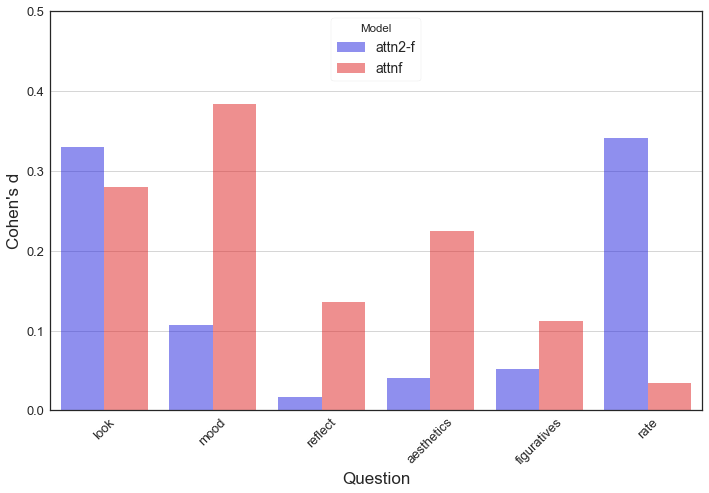

In [104]:
plt.figure(figsize=(10,7))
ax = plt.gca()
ax.grid(True)
b = sns.barplot(y="value", x="question", hue="model", hue_order=["attn2-f","attnf"], data=df_melted_tests[df_melted_tests.variable.isin(["cohensd"])], palette=["blue","red","green"], alpha=0.5)
b.set_xlabel("Question",fontsize=17)
b.set_ylabel("Cohen's d",fontsize=17)
b.tick_params(labelsize=13)
b.set_xticklabels(b.get_xticklabels(), rotation=45)
plt.ylim((0,0.5))

plt.legend(title="Model", fontsize=14, frameon=True, loc=9)
plt.tight_layout()
# plt.savefig("cohens_d.pdf")

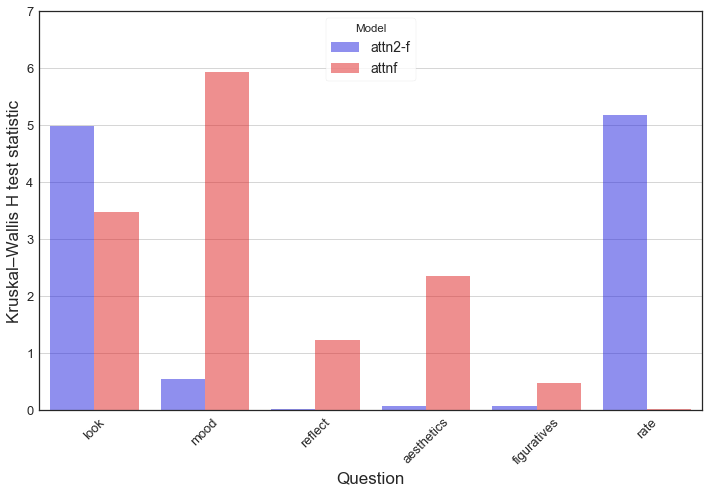

In [120]:
plt.figure(figsize=(10,7))
ax = plt.gca()
ax.grid(True)
b = sns.barplot(y="value", x="question", hue="model", hue_order=["attn2-f","attnf"], data=df_melted_tests[df_melted_tests.variable.isin(["kwh_stat"])], palette=["blue","red","green"], alpha=0.5)
b.set_xlabel("Question",fontsize=17)
b.set_ylabel("Kruskal–Wallis H test statistic",fontsize=17)
b.tick_params(labelsize=13)
b.set_xticklabels(b.get_xticklabels(), rotation=45)
plt.ylim((0,7))

plt.legend(title="Model", fontsize=14, frameon=True, loc = 9)
plt.tight_layout()
#plt.savefig("kwh.pdf")